In [2]:
!pip install pandas

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
from mplsoccer.pitch import Pitch
import seaborn as sns

In [51]:
df = pd.read_csv('events_1729243.csv')

In [52]:
df

,league,season,game,id,game_id,period,minute,second,expanded_minute,type,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
0,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209451,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'TeamFormation', 'va...",False,NaN,NaN,NaN,NaN,NaN
1,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209477,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'JerseyNumber', 'val...",False,NaN,NaN,NaN,NaN,NaN
2,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287459,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
3,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287467,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
4,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287487,1729243,FirstHalf,0,0.0,0,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617629057,1729243,SecondHalf,67,37.0,74,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'PassEndX', 'value':...",True,NaN,NaN,NaN,NaN,NaN
1595,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617629081,1729243,SecondHalf,67,40.0,74,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'StandingSave', 'val...",True,NaN,NaN,NaN,NaN,NaN
1596,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617629595,1729243,SecondHalf,71,57.0,78,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'PassEndX', 'value':...",True,NaN,NaN,NaN,NaN,NaN
1597,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617630253,1729243,SecondHalf,80,30.0,87,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'PassEndY', 'value':...",True,NaN,NaN,NaN,NaN,NaN


In [53]:
column_names = df.columns
print("Column names:", column_names)

Column names: Index(['league', 'season', 'game', 'id', 'game_id', 'period', 'minute',
       'second', 'expanded_minute', 'type', 'outcome_type', 'team_id', 'team',
       'player_id', 'player', 'x', 'y', 'end_x', 'end_y', 'goal_mouth_y',
       'goal_mouth_z', 'blocked_x', 'blocked_y', 'qualifiers', 'is_touch',
       'is_shot', 'is_goal', 'card_type', 'related_event_id',
       'related_player_id'],
      dtype='object')


In [82]:
df_shorten = df[['period', 'minute', 'second', 'type', 'outcome_type', 'team_id', 'team','player_id', 'player', 'x', 'y', 'end_x', 'end_y']]

In [83]:
df_shorten

,period,minute,second,type,outcome_type,team_id,team,player_id,player,x,y,end_x,end_y
4,FirstHalf,0,0.0,Pass,Successful,15,Chelsea,426050.0,Nicolas Jackson,50.4,49.3,44.9,44.5
5,FirstHalf,0,1.0,Pass,Successful,15,Chelsea,369430.0,Enzo Fernández,47.5,44.0,60.8,3.2
6,FirstHalf,0,5.0,Pass,Successful,15,Chelsea,361330.0,Reece James,43.6,10.7,26.7,29.4
7,FirstHalf,0,8.0,Pass,Successful,15,Chelsea,300426.0,Axel Disasi,26.7,29.4,8.7,49.7
8,FirstHalf,0,13.0,Pass,Successful,15,Chelsea,362151.0,Robert Sánchez,9.9,55.7,41.9,91.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,SecondHalf,67,37.0,Pass,Successful,167,Man City,121774.0,Ederson,12.5,32.9,44.2,4.3
1595,SecondHalf,67,40.0,Pass,Successful,167,Man City,313171.0,Rúben Dias,44.2,4.3,55.6,25.7
1596,SecondHalf,71,57.0,Pass,Successful,15,Chelsea,363496.0,Marc Cucurella,46.2,72.3,40.8,58.2
1597,SecondHalf,80,30.0,Pass,Successful,167,Man City,313171.0,Rúben Dias,9.0,41.5,8.4,68.0


In [84]:
df_passes = df_shorten[df_shorten['type'] == 'Pass']

In [85]:
df_passes

,period,minute,second,type,outcome_type,team_id,team,player_id,player,x,y,end_x,end_y
4,FirstHalf,0,0.0,Pass,Successful,15,Chelsea,426050.0,Nicolas Jackson,50.4,49.3,44.9,44.5
5,FirstHalf,0,1.0,Pass,Successful,15,Chelsea,369430.0,Enzo Fernández,47.5,44.0,60.8,3.2
6,FirstHalf,0,5.0,Pass,Successful,15,Chelsea,361330.0,Reece James,43.6,10.7,26.7,29.4
7,FirstHalf,0,8.0,Pass,Successful,15,Chelsea,300426.0,Axel Disasi,26.7,29.4,8.7,49.7
8,FirstHalf,0,13.0,Pass,Successful,15,Chelsea,362151.0,Robert Sánchez,9.9,55.7,41.9,91.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,SecondHalf,67,37.0,Pass,Successful,167,Man City,121774.0,Ederson,12.5,32.9,44.2,4.3
1595,SecondHalf,67,40.0,Pass,Successful,167,Man City,313171.0,Rúben Dias,44.2,4.3,55.6,25.7
1596,SecondHalf,71,57.0,Pass,Successful,15,Chelsea,363496.0,Marc Cucurella,46.2,72.3,40.8,58.2
1597,SecondHalf,80,30.0,Pass,Successful,167,Man City,313171.0,Rúben Dias,9.0,41.5,8.4,68.0


In [86]:
#df_passes.to_csv('passes.csv', index=False)

In [87]:
#Convert the data into mplsoccer pitch
df_passes ['x'] = df_passes ['x']*1.2
df_passes ['y'] = df_passes ['y']*.8
df_passes ['end_x'] = df_passes ['end_x']*1.2
df_passes ['end_y'] = df_passes ['end_y']*.8

In [88]:
df_passes

,period,minute,second,type,outcome_type,team_id,team,player_id,player,x,y,end_x,end_y
4,FirstHalf,0,0.0,Pass,Successful,15,Chelsea,426050.0,Nicolas Jackson,60.48,39.44,53.88,35.60
5,FirstHalf,0,1.0,Pass,Successful,15,Chelsea,369430.0,Enzo Fernández,57.00,35.20,72.96,2.56
6,FirstHalf,0,5.0,Pass,Successful,15,Chelsea,361330.0,Reece James,52.32,8.56,32.04,23.52
7,FirstHalf,0,8.0,Pass,Successful,15,Chelsea,300426.0,Axel Disasi,32.04,23.52,10.44,39.76
8,FirstHalf,0,13.0,Pass,Successful,15,Chelsea,362151.0,Robert Sánchez,11.88,44.56,50.28,72.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,SecondHalf,67,37.0,Pass,Successful,167,Man City,121774.0,Ederson,15.00,26.32,53.04,3.44
1595,SecondHalf,67,40.0,Pass,Successful,167,Man City,313171.0,Rúben Dias,53.04,3.44,66.72,20.56
1596,SecondHalf,71,57.0,Pass,Successful,15,Chelsea,363496.0,Marc Cucurella,55.44,57.84,48.96,46.56
1597,SecondHalf,80,30.0,Pass,Successful,167,Man City,313171.0,Rúben Dias,10.80,33.20,10.08,54.40


Text(0.75, 0.98, 'Unsuccessful Pass')

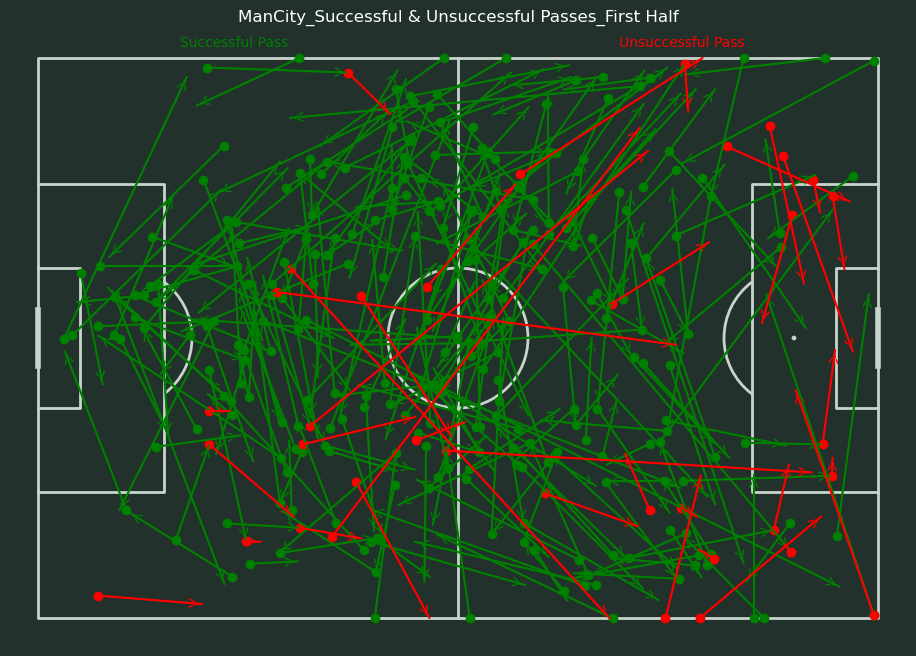

In [121]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(ax=ax)

plt.gca().invert_yaxis()

# plot the successful passes of ManCity during First Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Successful' and row['team'] == 'Man City' and row['period'] == 'FirstHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='green')
        plt.scatter(row['x'], row['y'], color='green') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='green',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        
# plot the unsuccessful passes of ManCity during First Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Unsuccessful' and row['team'] == 'Man City' and row['period'] == 'FirstHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='red')
        plt.scatter(row['x'], row['y'], color='red') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='red',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        

# set the title 
title_text = 'ManCity_Successful & Unsuccessful Passes_First Half'
ax.set_title(title_text, color='white')

# add the legend
ax.text(0.25, 0.98, 'Successful Pass', color='green', fontsize=10, ha='center', va='center', transform=ax.transAxes)
ax.text(0.75, 0.98, 'Unsuccessful Pass', color='red', fontsize=10, ha='center', va='center', transform=ax.transAxes)

Text(0.75, 0.98, 'Unsuccessful Pass')

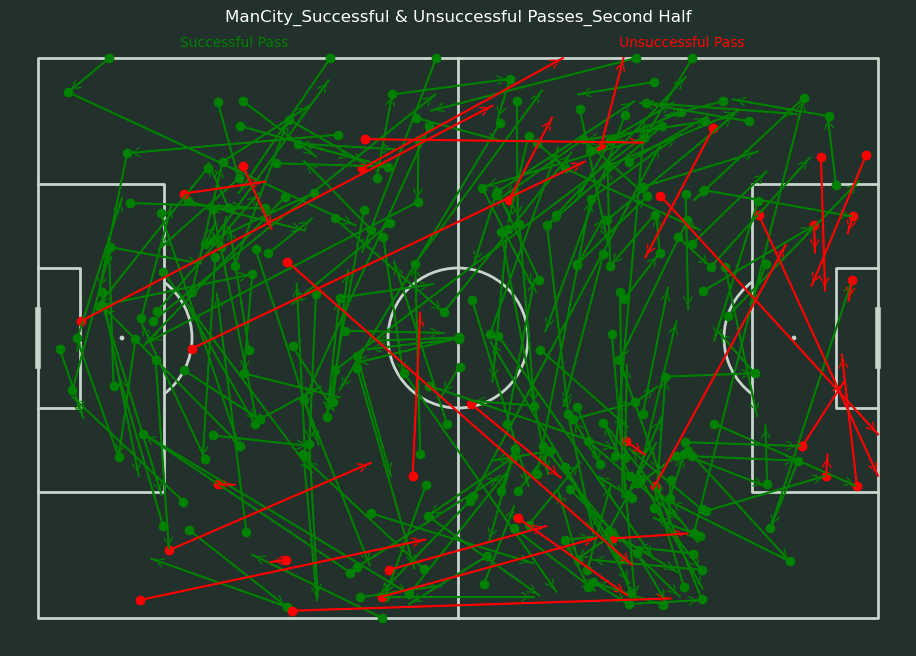

In [122]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(ax=ax)

plt.gca().invert_yaxis()

# plot the successful passes of ManCity during Second Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Successful' and row['team'] == 'Man City' and row['period'] == 'SecondHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='green')
        plt.scatter(row['x'], row['y'], color='green') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='green',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        
# plot the unsuccessful passes of ManCity during Second Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Unsuccessful' and row['team'] == 'Man City' and row['period'] == 'SecondHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='red')
        plt.scatter(row['x'], row['y'], color='red') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='red',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        

# set the title 
title_text = 'ManCity_Successful & Unsuccessful Passes_Second Half'
ax.set_title(title_text, color='white')

# add the legend
ax.text(0.25, 0.98, 'Successful Pass', color='green', fontsize=10, ha='center', va='center', transform=ax.transAxes)
ax.text(0.75, 0.98, 'Unsuccessful Pass', color='red', fontsize=10, ha='center', va='center', transform=ax.transAxes)

Text(0.75, 0.98, 'Unsuccessful Pass')

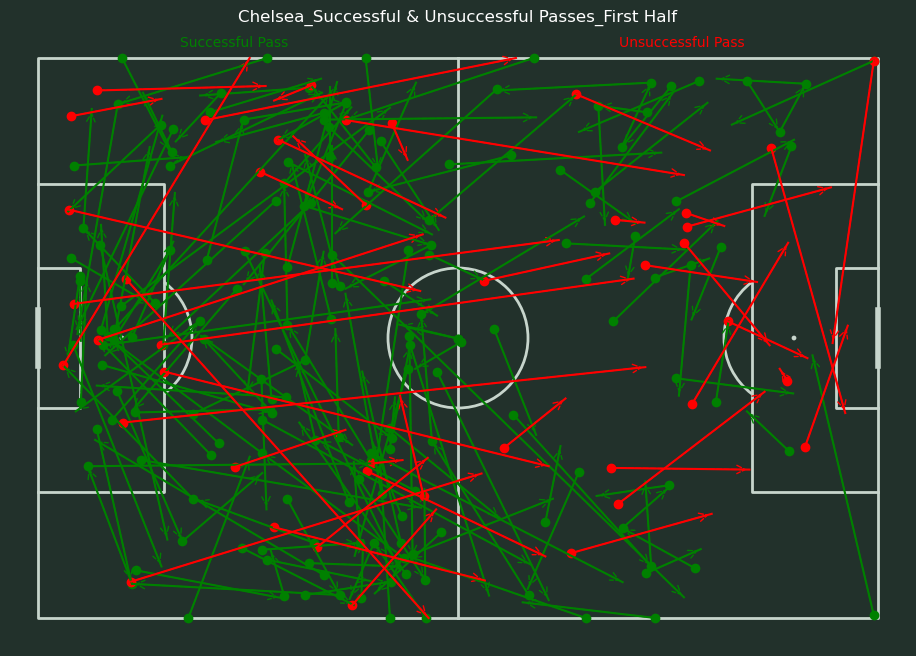

In [124]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(ax=ax)

plt.gca().invert_yaxis()

# plot the successful passes of Chelsea during First Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Successful' and row['team'] == 'Chelsea' and row['period'] == 'FirstHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='green')
        plt.scatter(row['x'], row['y'], color='green') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='green',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        
# plot the unsuccessful passes of Chelsea during First Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Unsuccessful' and row['team'] == 'Chelsea' and row['period'] == 'FirstHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='red')
        plt.scatter(row['x'], row['y'], color='red') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='red',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        

# set the title 
title_text = 'Chelsea_Successful & Unsuccessful Passes_First Half'
ax.set_title(title_text, color='white')

# add the legend
ax.text(0.25, 0.98, 'Successful Pass', color='green', fontsize=10, ha='center', va='center', transform=ax.transAxes)
ax.text(0.75, 0.98, 'Unsuccessful Pass', color='red', fontsize=10, ha='center', va='center', transform=ax.transAxes)

Text(0.75, 0.98, 'Unsuccessful Pass')

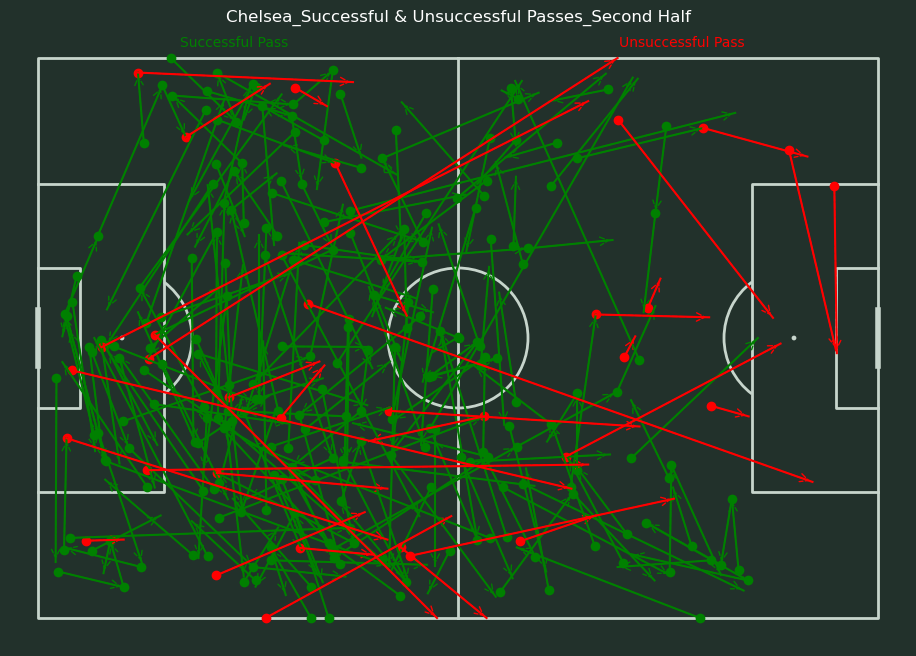

In [125]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(ax=ax)

plt.gca().invert_yaxis()

# plot the successful passes of Chelsea during Second Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Successful' and row['team'] == 'Chelsea' and row['period'] == 'SecondHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='green')
        plt.scatter(row['x'], row['y'], color='green') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='green',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        
# plot the unsuccessful passes of Chelsea during Second Half of the match:
for index, row in df_passes.iterrows():
    if row['outcome_type'] == 'Unsuccessful' and row['team'] == 'Chelsea' and row['period'] == 'SecondHalf':
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='red')
        plt.scatter(row['x'], row['y'], color='red') #point - begining of the pass
        
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='red',
                                        mutation_scale=15, arrowstyle='->', linestyle='dashed')
        ax.add_patch(arrow) #arrow - pass direction
        

# set the title 
title_text = 'Chelsea_Successful & Unsuccessful Passes_Second Half'
ax.set_title(title_text, color='white')

# add the legend
ax.text(0.25, 0.98, 'Successful Pass', color='green', fontsize=10, ha='center', va='center', transform=ax.transAxes)
ax.text(0.75, 0.98, 'Unsuccessful Pass', color='red', fontsize=10, ha='center', va='center', transform=ax.transAxes)